<a href="https://colab.research.google.com/github/mahadrana054/Crop-yield-prediction/blob/main/Crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
df = pd.read_csv("/content/yield_df.csv")

In [ ]:
df.sample(5)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
26622,26622,Turkey,Wheat,1993,21642,593.0,28042.00,11.45
21815,21815,Pakistan,Sweet potatoes,1991,101190,494.0,5962.00,24.38
19452,19452,Mexico,"Rice, paddy",1997,41365,758.0,34468.93,19.65
15033,15033,Indonesia,Potatoes,2004,163870,2702.0,1597.00,27.57
13854,13854,India,Cassava,2010,347555,1083.0,40093.69,27.69


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(25932, 7)

In [ ]:
df.size

181524

In [ ]:
corr = df.corr(numeric_only=True)

In [ ]:
len(df['Area'].unique())

101

In [ ]:
len(df['Item'].unique())

10

DATA VISUALIZATION

/tmp/ipython-input-1685305623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Area'], palette='tab10')


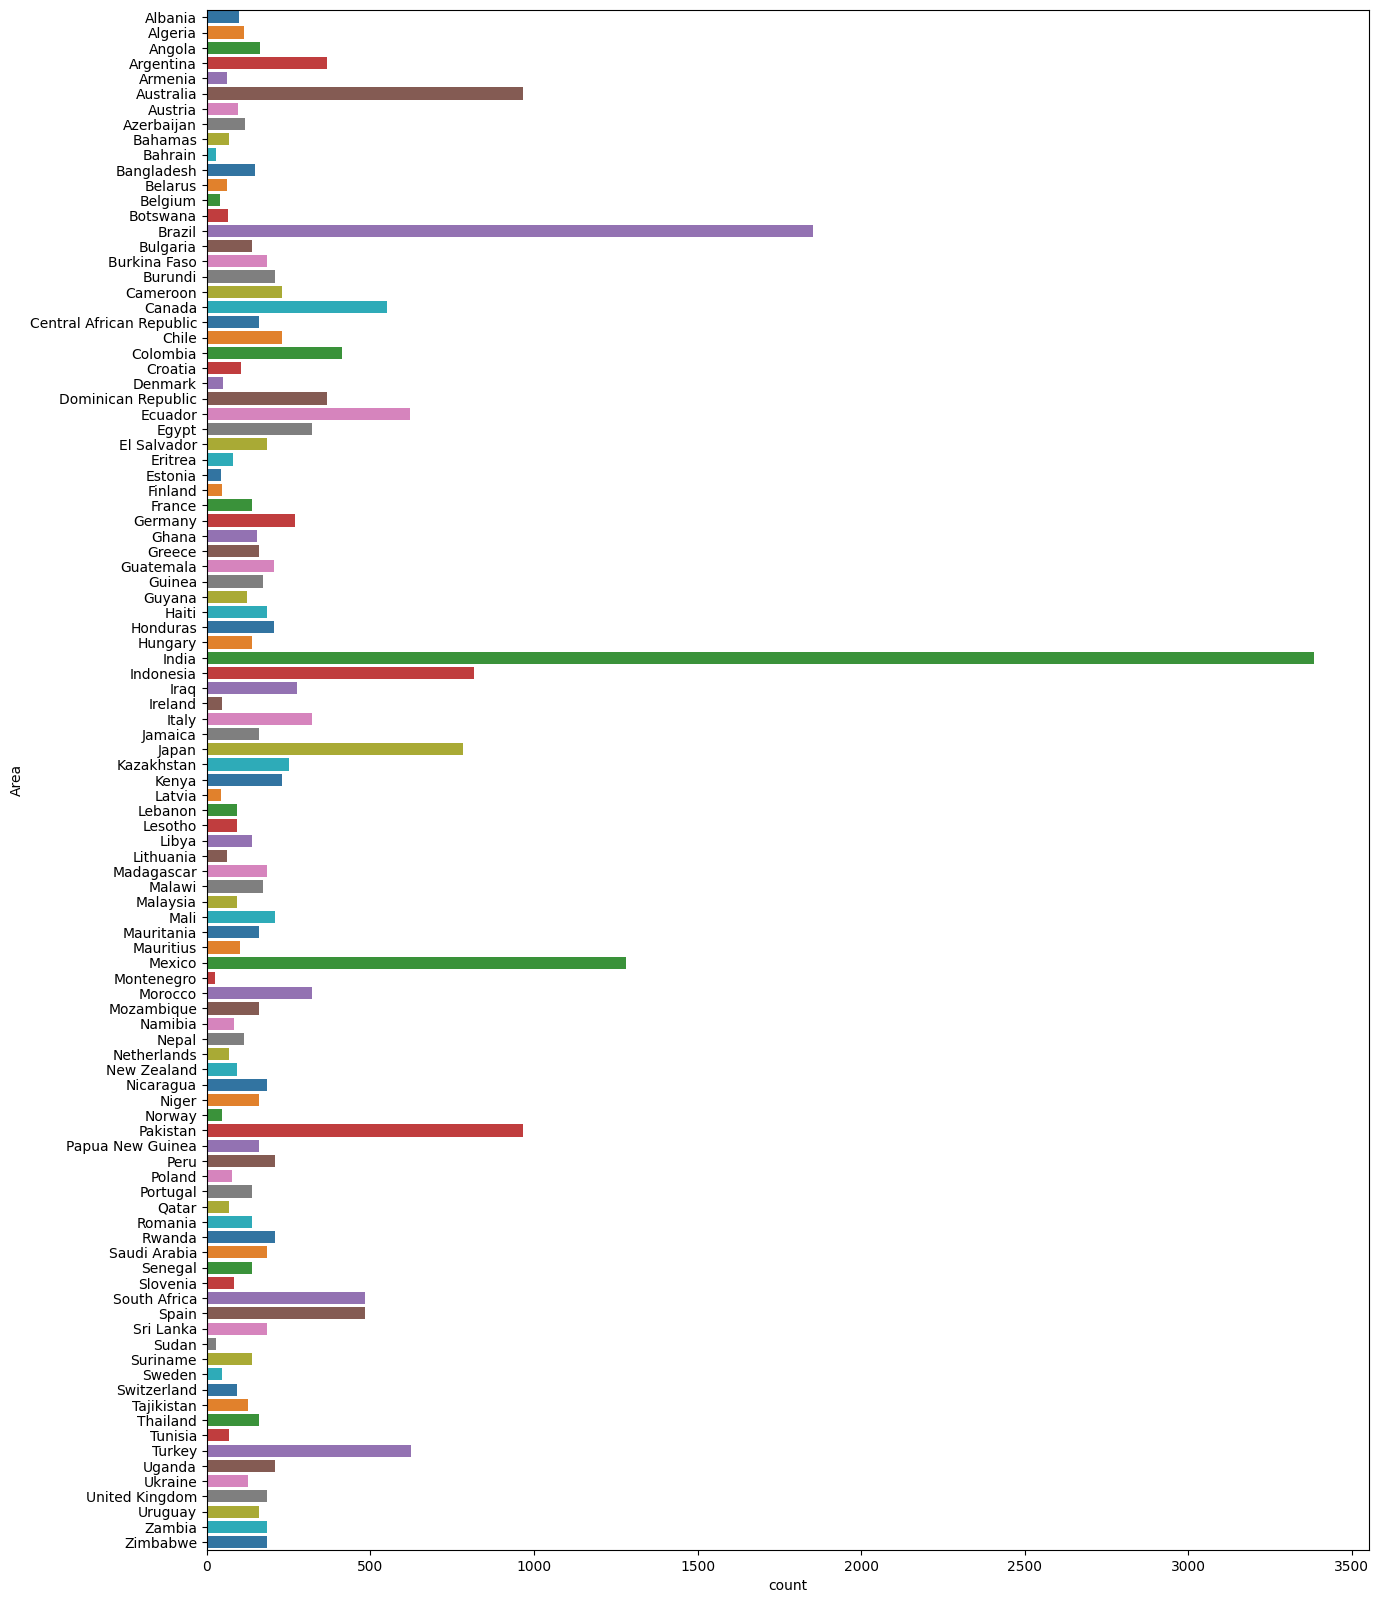

In [ ]:
plt.figure(figsize=(15, 20))
sns.countplot(y=df['Area'], palette='tab10')
plt.show()

/tmp/ipython-input-1872676028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['Item'], palette = 'tab10')


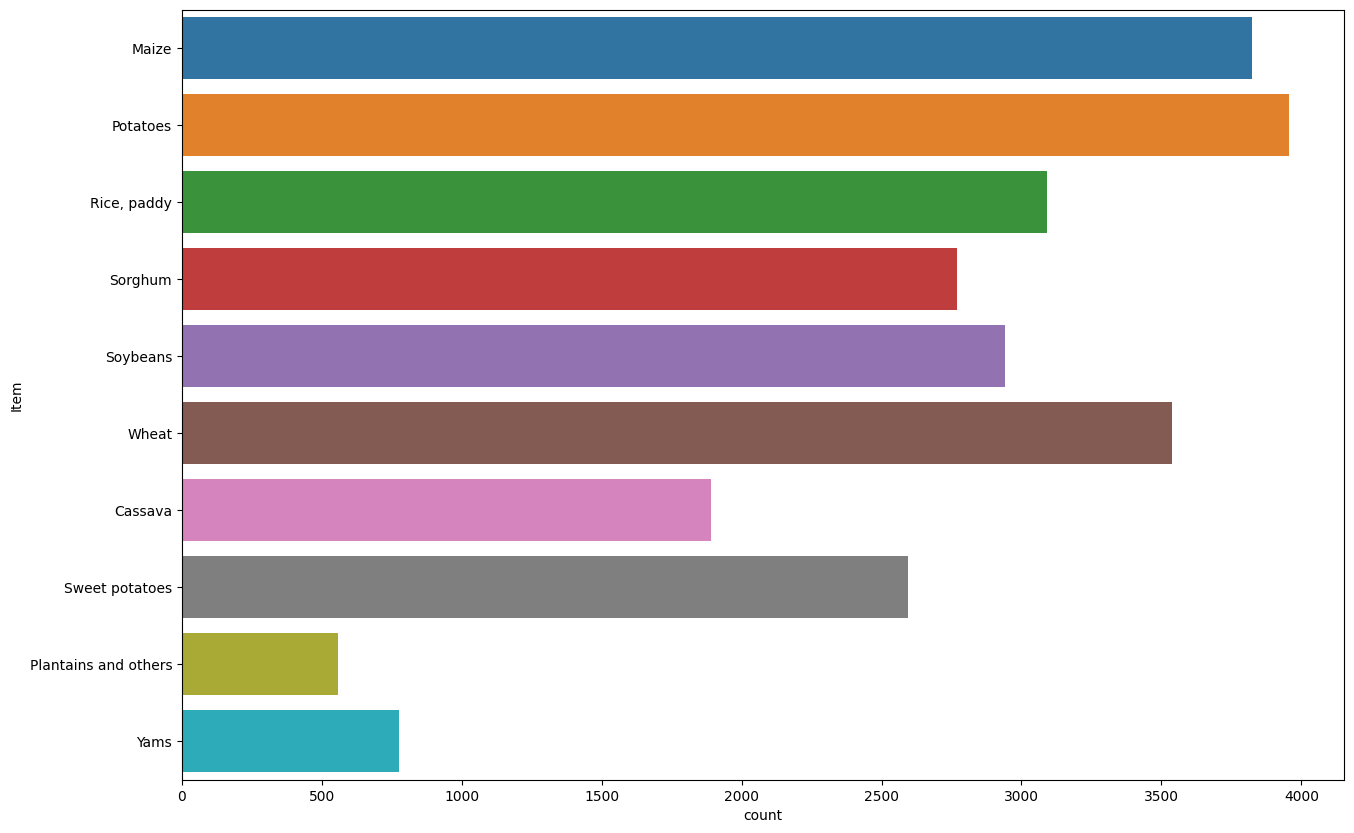

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y = df['Item'], palette = 'tab10')
plt.show()

In [ ]:
(df['Area'].value_counts() > 500).sum()

np.int64(10)

In [ ]:
country = df['Area'].unique()
yeild_per_country = []
for state in country:
  yeild_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [ ]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


/tmp/ipython-input-1554753490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = country, y = yeild_per_country, palette='tab10')


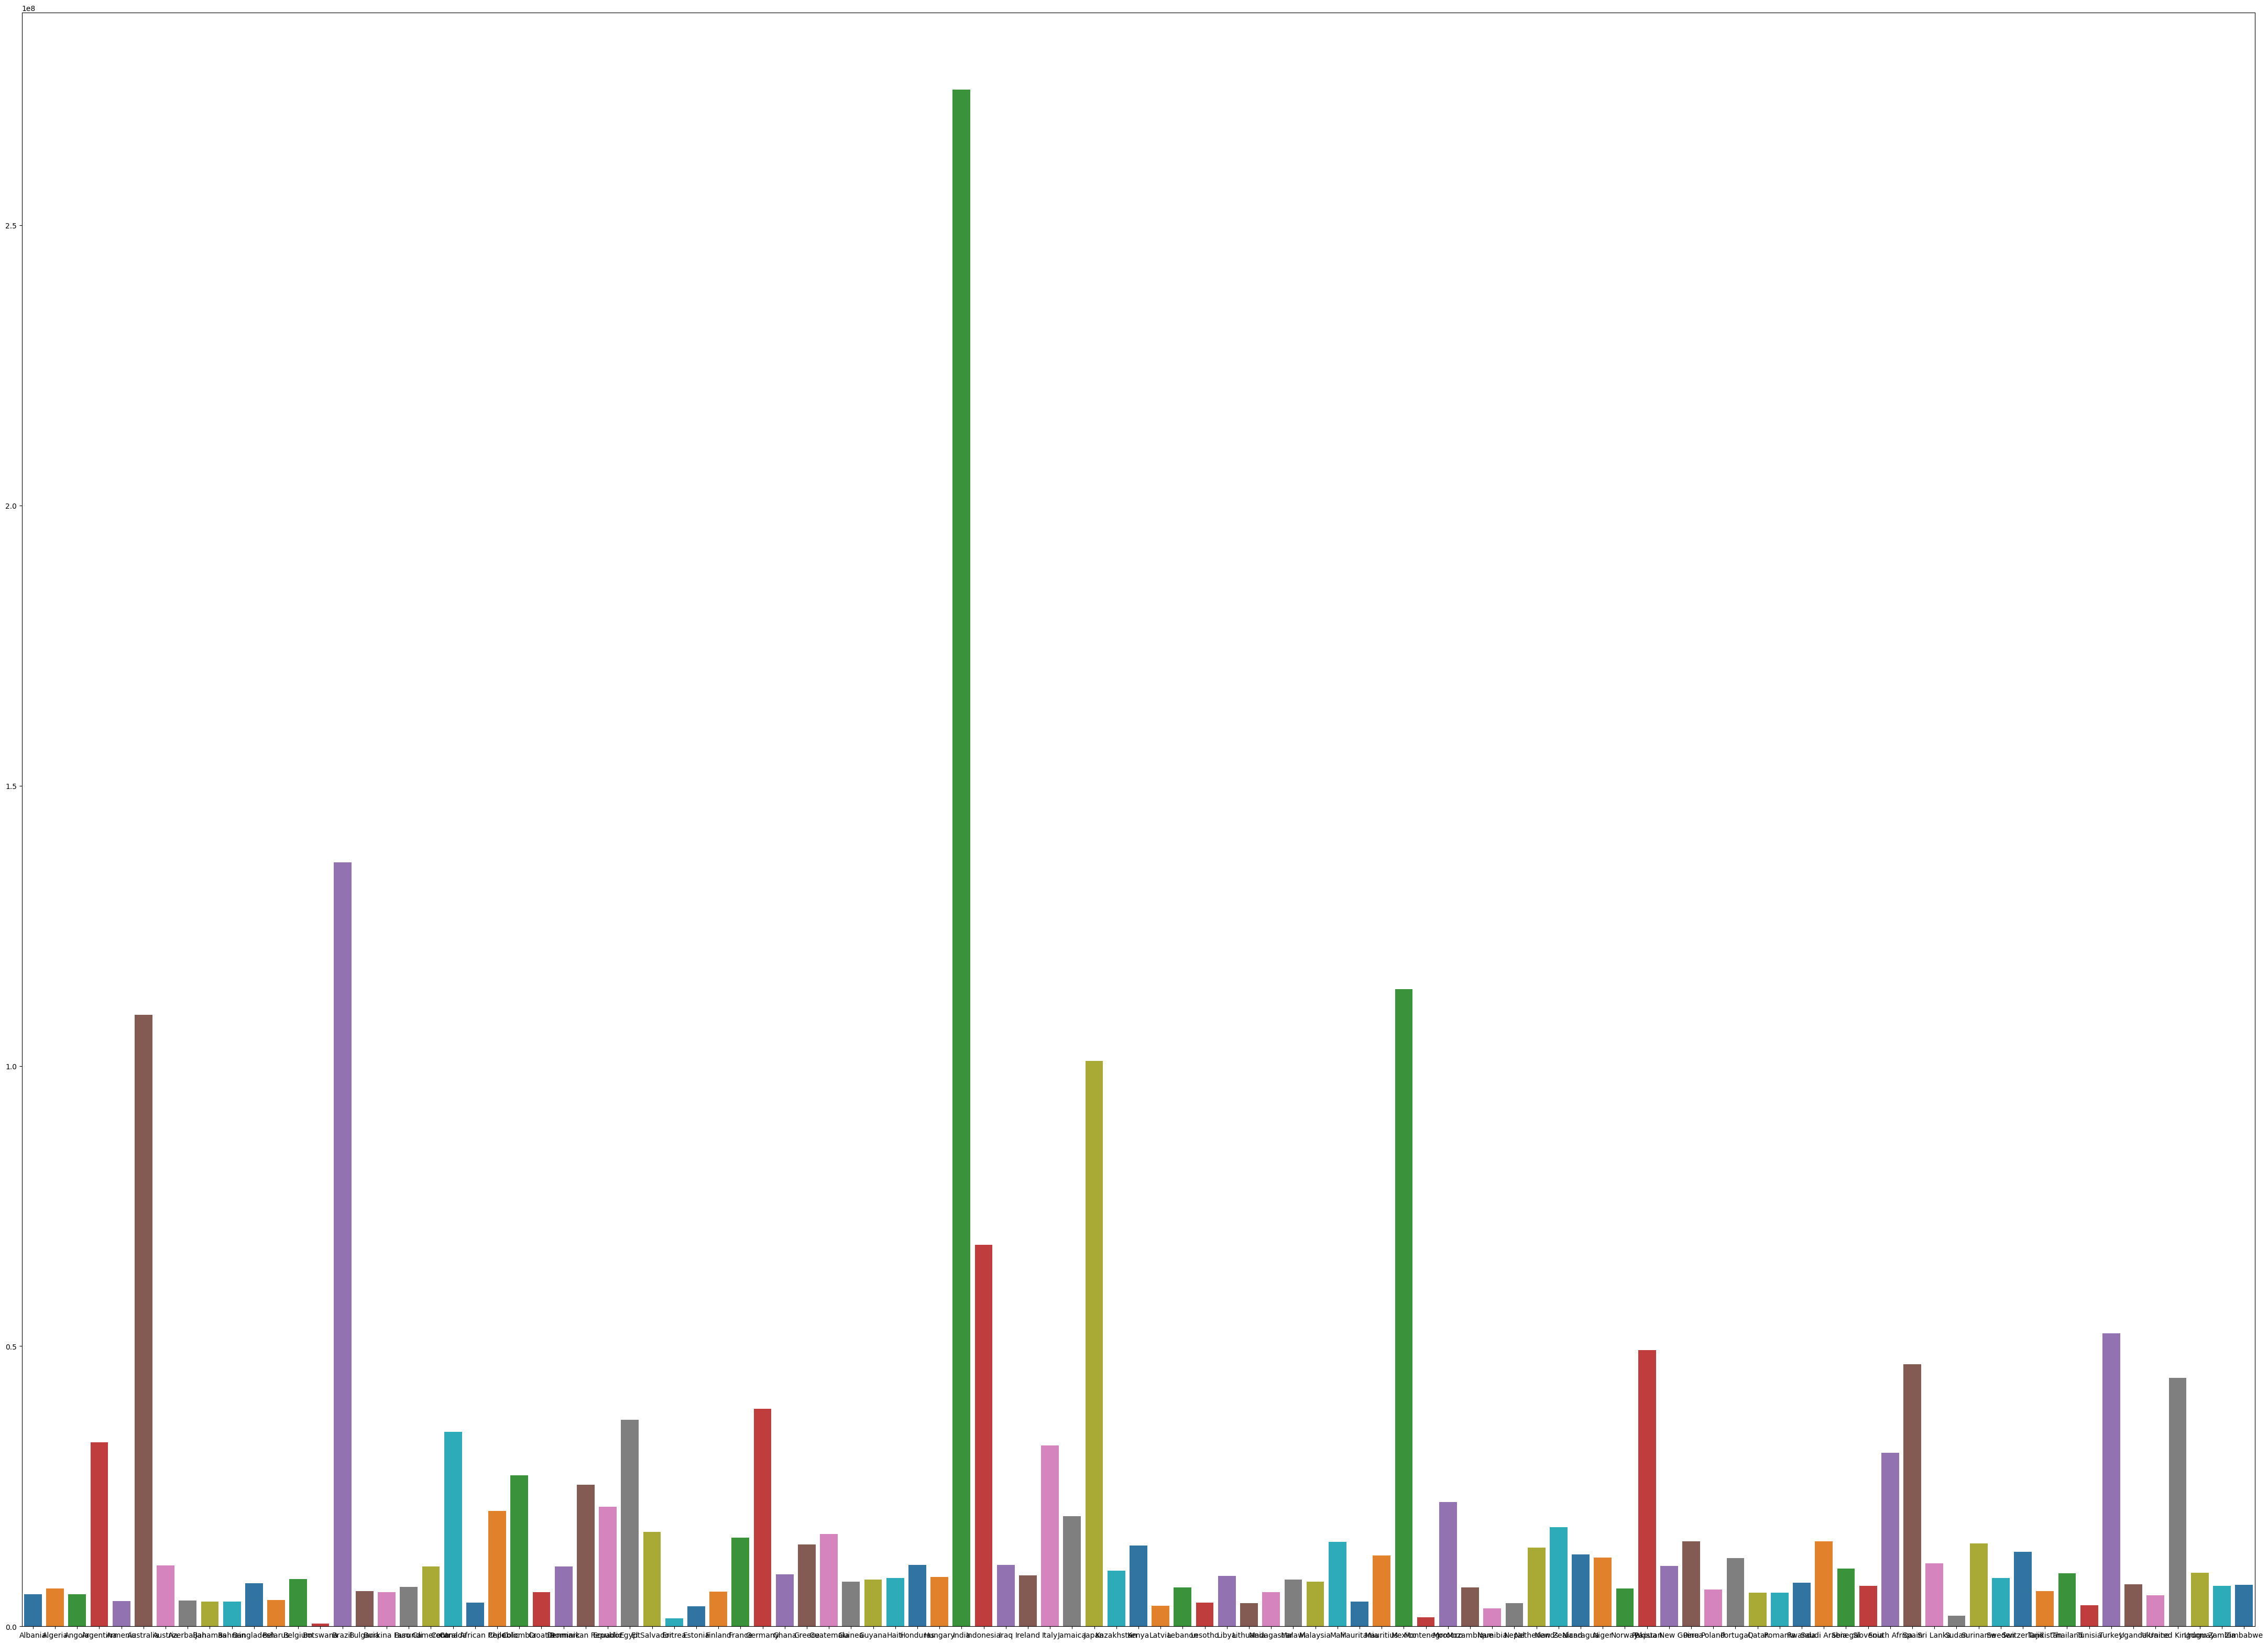

In [ ]:
plt.figure(figsize=(55,40))
sns.barplot(x = country, y = yeild_per_country, palette='tab10')
plt.show()

In [ ]:
crop = df['Item'].unique()
yeild_per_crop = []
for state in crop:
  yeild_per_crop.append(df[df['Item'] == state]['hg/ha_yield'].sum())

/tmp/ipython-input-3062417288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = crop, y = yeild_per_crop, palette='tab10')


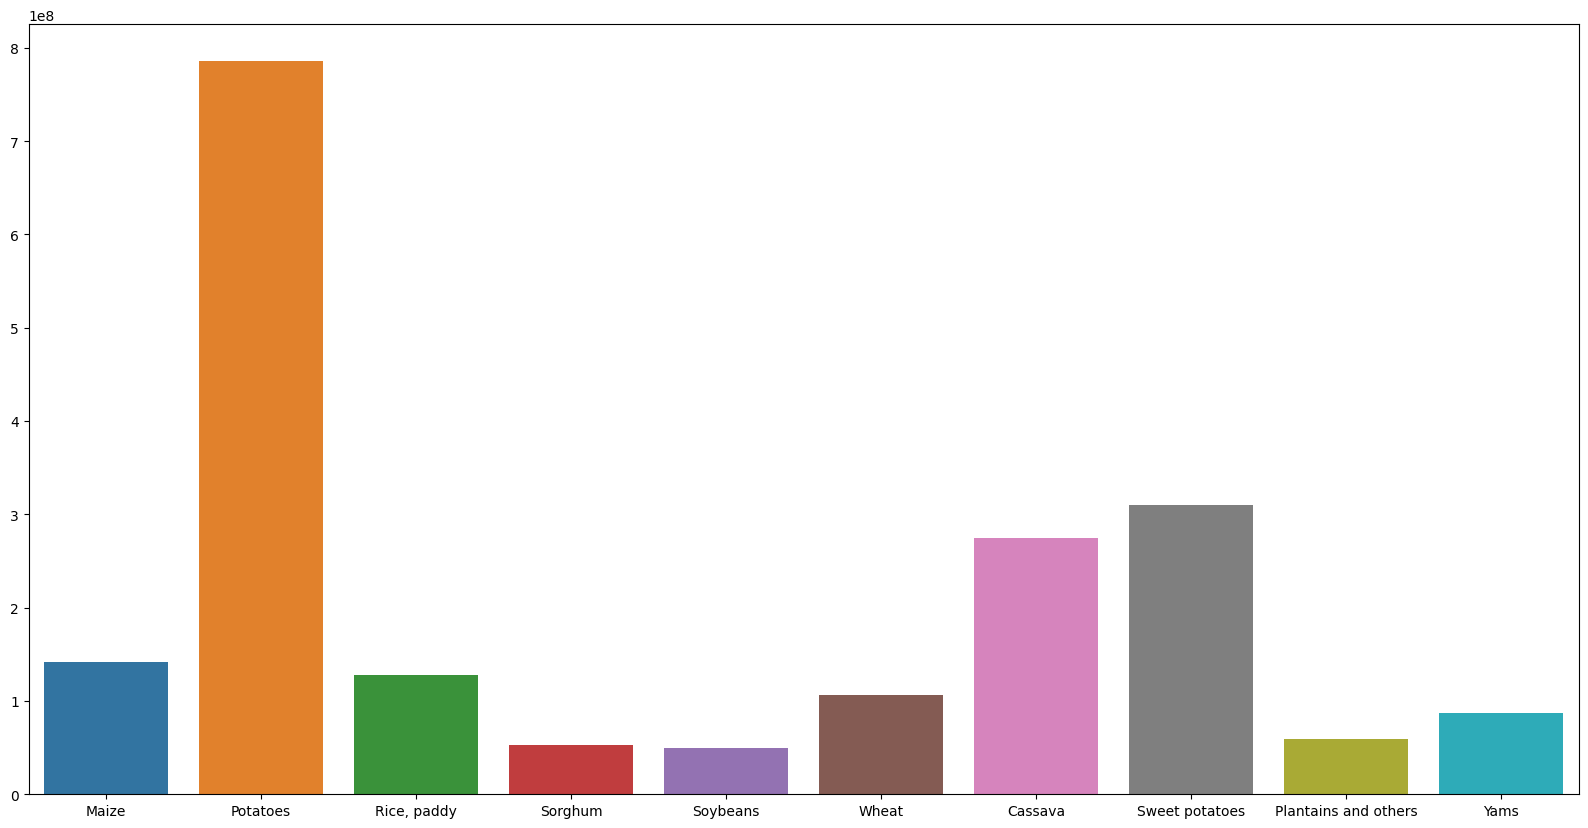

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = crop, y = yeild_per_crop, palette='tab10')
plt.show()

In [ ]:
x = df.drop(columns=['hg/ha_yield'])
y = df['hg/ha_yield']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=42)

In [ ]:
ohe = OneHotEncoder(drop='first')
scalar = StandardScaler()
preprocessor = ColumnTransformer( transformers = [
    ('scale', scalar, [2,3,4,5]),
    ('ohe', ohe, [0,1]),
], remainder = 'passthrough')

In [ ]:
x_train_d = preprocessor.fit_transform(x_train)
x_test_d = preprocessor.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
model = {
    'LinearRegression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision' : DecisionTreeRegressor(),
    'Kneigbours' : KNeighborsRegressor()
}

In [ ]:
for name, md in model.items():
  md.fit(x_train_d, y_train)
  y_pred = md.predict(x_test_d)
  print(f"{name} mae : {mean_absolute_error(y_pred, y_test)} r2_score :  {r2_score(y_pred, y_test)}")


LinearRegression mae : 29017.937205223898 r2_score :  0.6752410930484063


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47841963274.09375, tolerance: 16813258357.110529
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso mae : 29005.83076045403 r2_score :  0.6747624618860573
Ridge mae : 28979.91637232573 r2_score :  0.6739532753829793
Decision mae : 4279.626831148805 r2_score :  0.9734248146141631
Kneigbours mae : 4609.154895913647 r2_score :  0.9815454315845351


In [ ]:
knn = KNeighborsRegressor()
knn.fit(x_train_d, y_train)
knn.predict(x_test_d)

array([134816.4,  15937.8,  72138.2, ...,  30694.2,  64862.2, 101288. ])

In [ ]:
def predictions(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
  features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]])
  transformed = preprocessor.transform(features)
  predicted_yield = knn.predict(transformed).reshape(-1, 1)
  return predicted_yield[0][0]

In [ ]:
import joblib
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", KNeighborsRegressor())
])

pipeline.fit(x_train, y_train)

joblib.dump(pipeline, "yield_pipeline1.joblib")

['yield_pipeline.joblib']